In [1]:
# magics: ensures that any changes to the modules loaded below will be re-loaded automatically
%load_ext autoreload
%autoreload 2

# load general packages
import numpy as np

import plots
from ConsumptionSavingModel import ConsumptionSavingModelClass

# Solving the buffer-stock consumption model

Consider the canonical buffer-stock consumption model:

Bellman equation in ratio form: 

$$\begin{align*}
v_{t}(m_{t}) & = \max_{c_{t}}\left\{ \frac{c_{t}^{1-\rho}}{1-\rho}+\beta\mathbb{E}_{t}\left[(G L_{t+1} \psi_{t+1})^{1-\rho}v_{t+1}(m_{t+1})\right]\right\} \\
 & \text{s.t.}\\
 a_t & =  m_t-c_t \\
m_{t+1} & =  \frac{1}{G L_t \psi_{t+1}}Ra_t+\xi_{t+1}\\ 
\psi_{t} & \sim  \exp \mathcal{N}(-0.5 \sigma^2_{\psi},\sigma^2_{\psi})\\
\xi_{t} & \sim  \exp \mathcal{N}(-0.5 \sigma^2_{\xi},\sigma^2_{\xi}) \\
\end{align*}$$

and remember
$$\begin{align*}
Y_{t+1}& = \psi_{t+1} P_{t+1} \\
P_{t+1}& = GL_tP_t\psi_{t+1}\\ 
c_t & \equiv C_t/P_t \\
m_t & \equiv M_t/P_t \\
a_t & \equiv A_t/P_t \\
p_t & \equiv \ln(P_t) \\
y_t & \equiv \ln(Y_t) \\
\end{align*}$$



In [2]:
#Load baseline settings
model = ConsumptionSavingModelClass()

#Solve and simulate
model.precompile_numba()
model.solve()
model.simulate()

par = model.par
sol = model.sol
sim = model.sim

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


model simulated in 0.5 secs
model simulated in 4.1 secs


#### Plots

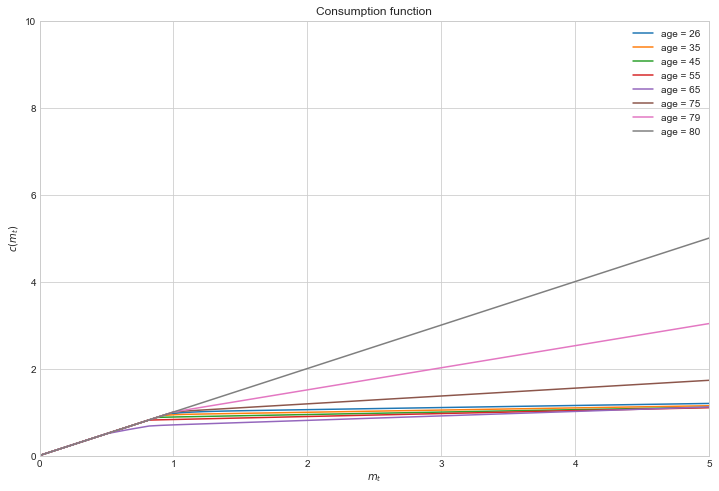

In [81]:
plots.plot_consumption(sol,par)

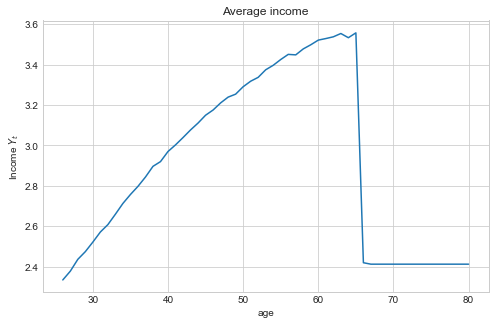

In [73]:
plots.plot_avg_income(sim,par)

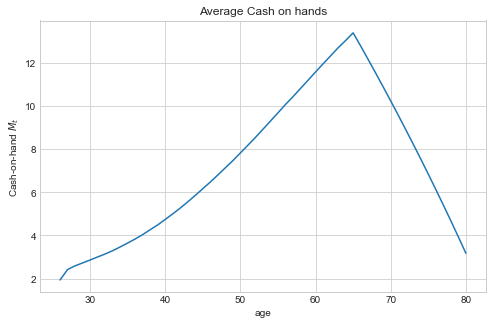

In [74]:
plots.plot_avg_cash_on_hand(sim,par)

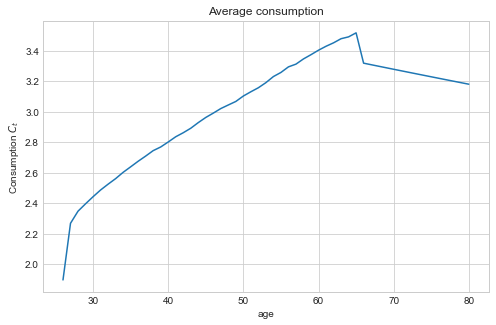

In [75]:
plots.plot_avg_consumption(sim,par)

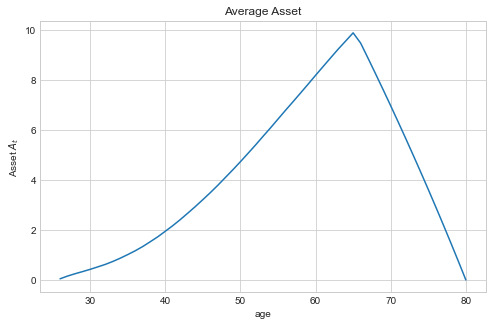

In [76]:
plots.plot_avg_assets(sim,par)

In [77]:
np.mean(sim.mpc,1)

array([0.82719682, 0.4043509 , 0.33150603, 0.25751886, 0.18989041,
       0.15592168, 0.12969813, 0.10503399, 0.08622505, 0.07392573,
       0.06700953, 0.06191587, 0.05845739, 0.0564403 , 0.05560482,
       0.05460719, 0.05511286, 0.05558892, 0.056018  , 0.05649815,
       0.05721916, 0.05800998, 0.05887601, 0.05982481, 0.06086369,
       0.06200241, 0.0632528 , 0.06463133, 0.06615497, 0.06783491,
       0.06970769, 0.07178933, 0.074125  , 0.0767487 , 0.07971808,
       0.08309509, 0.0869637 , 0.09143525, 0.09664953, 0.10279899,
       0.08292702, 0.08752602, 0.09284569, 0.09906623, 0.10643337,
       0.11529114, 0.12613645, 0.13971467, 0.1571971 , 0.18053589,
       0.2132449 , 0.26235186, 0.34425474, 0.50814753, 1.        ])

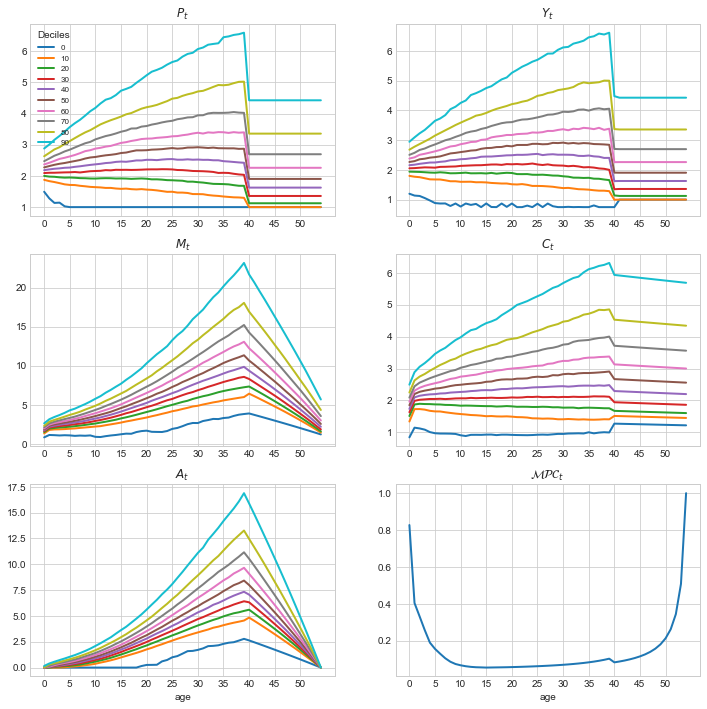

In [78]:
plots.lifecycle(par,sim,deciles=True)

<AxesSubplot:>

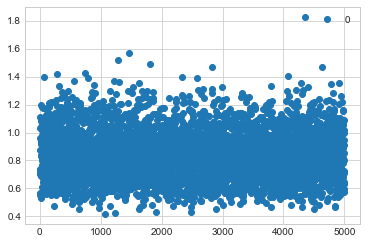

In [79]:
import pandas as pd
pd.DataFrame(sim.m0).plot(style='o')

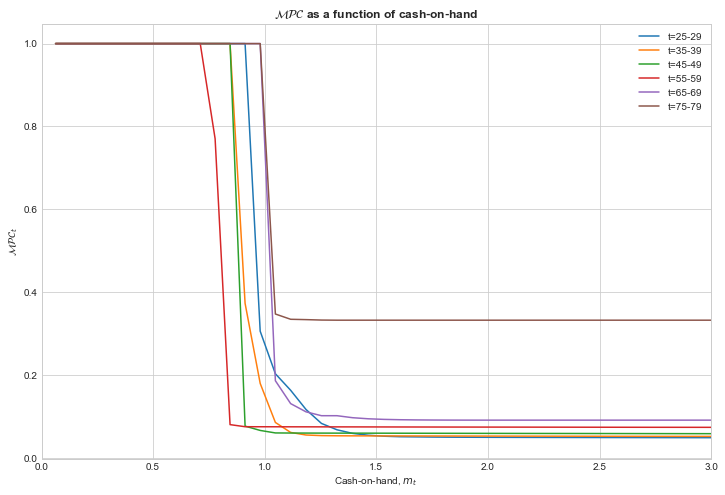

In [82]:
plots.mpc_over_cash_on_hand(par,sol,sim)